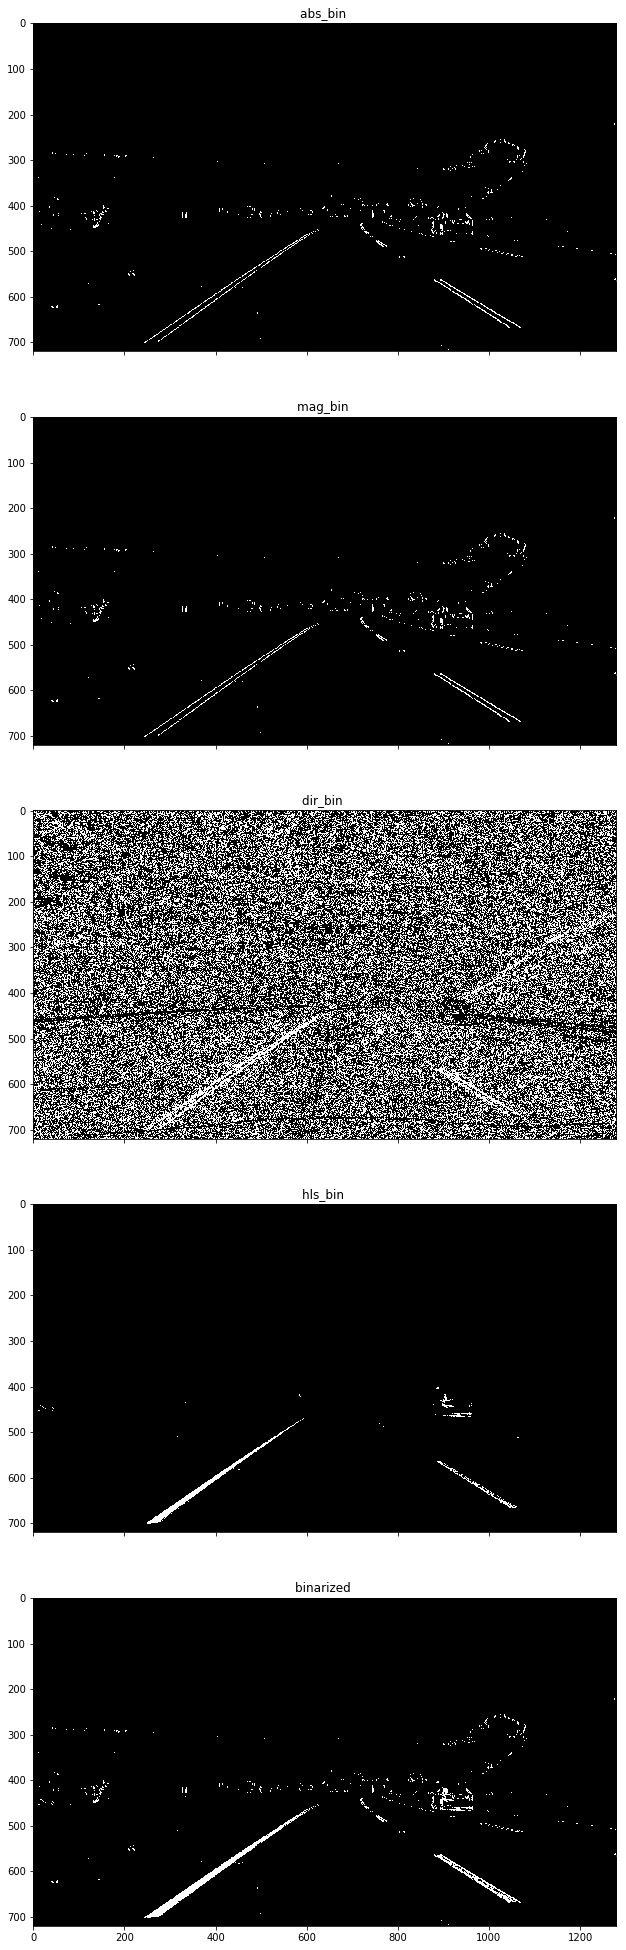

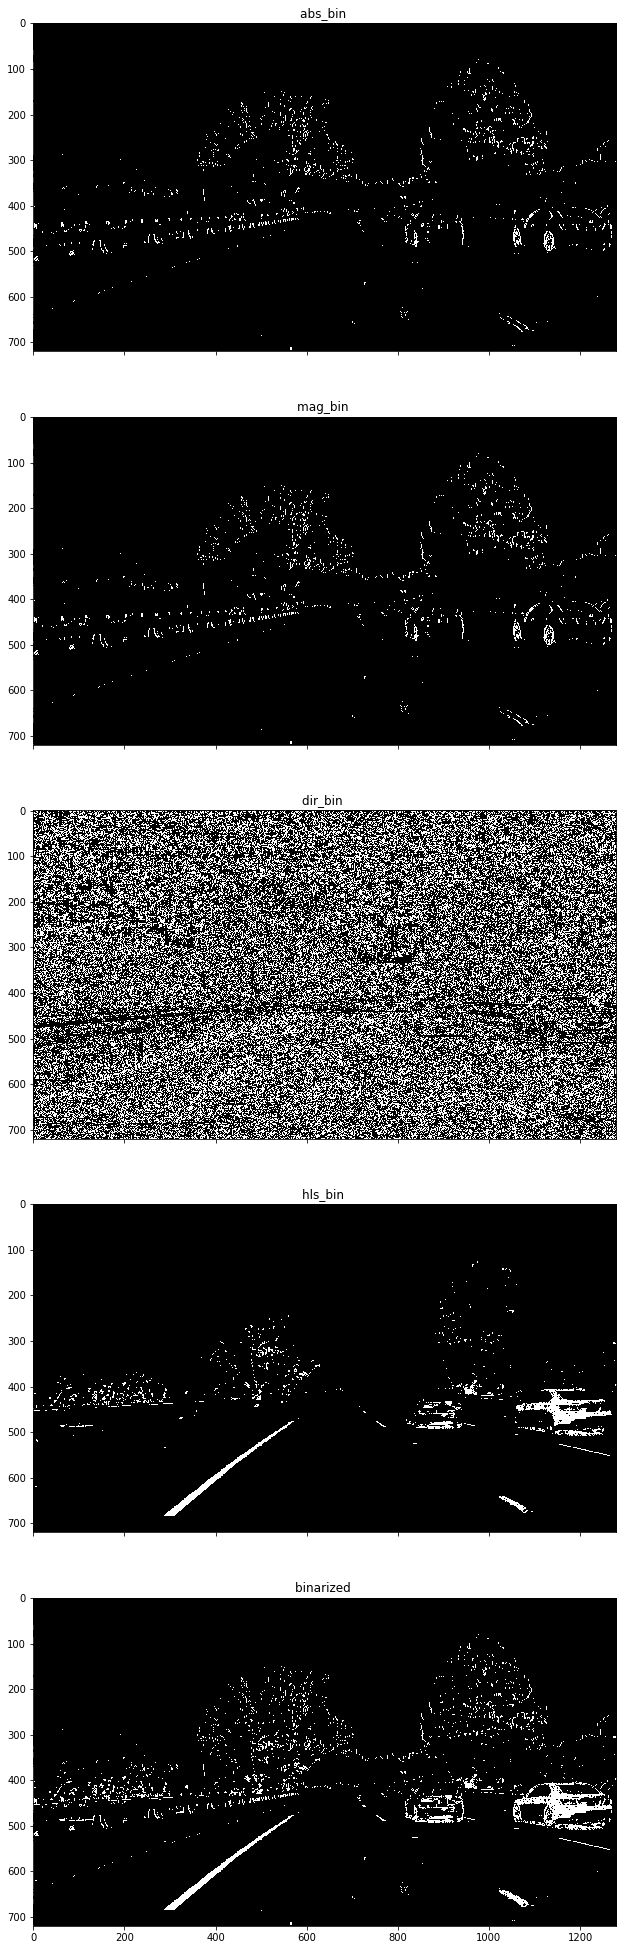

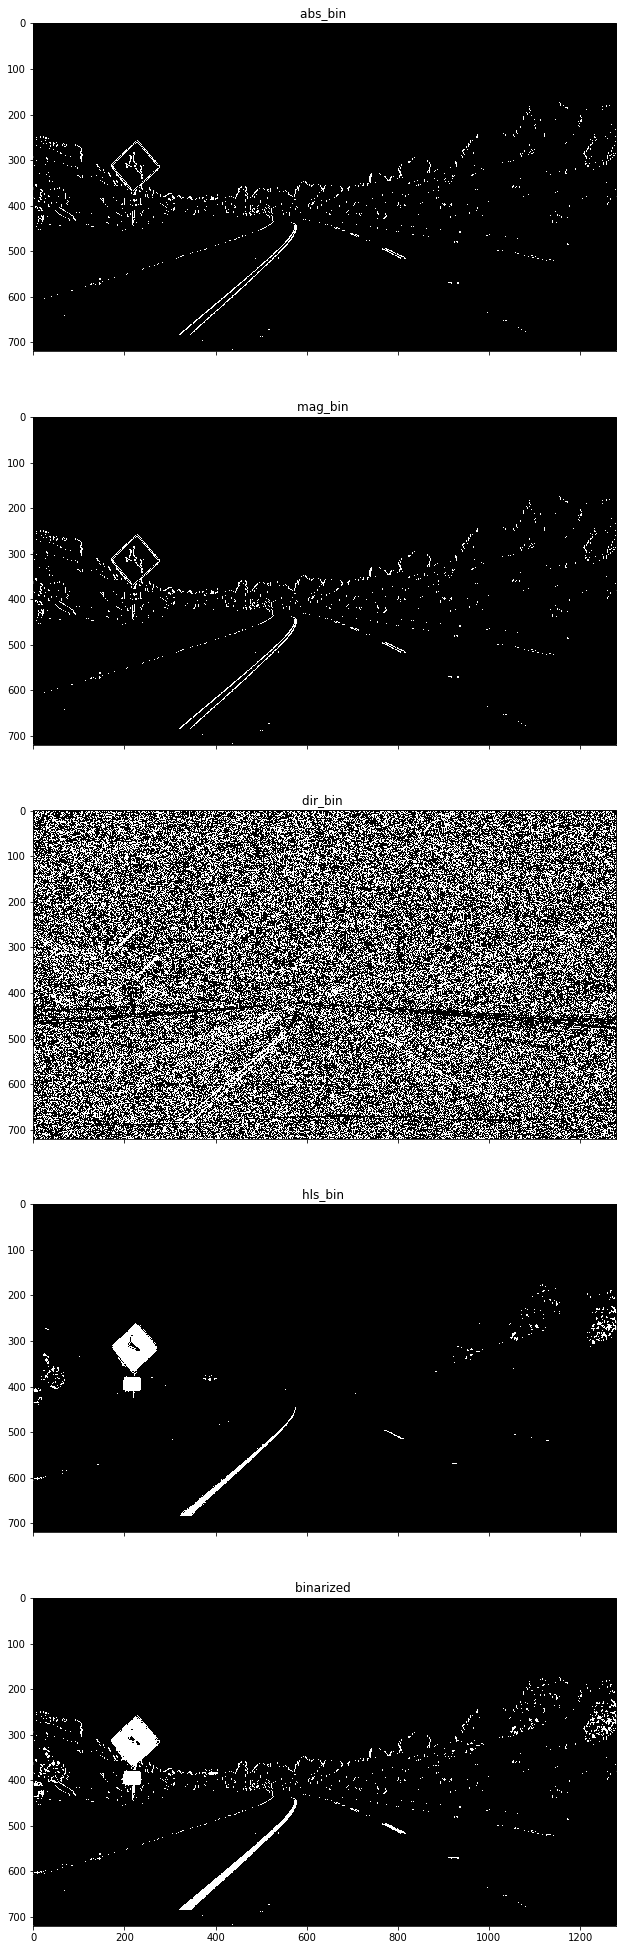

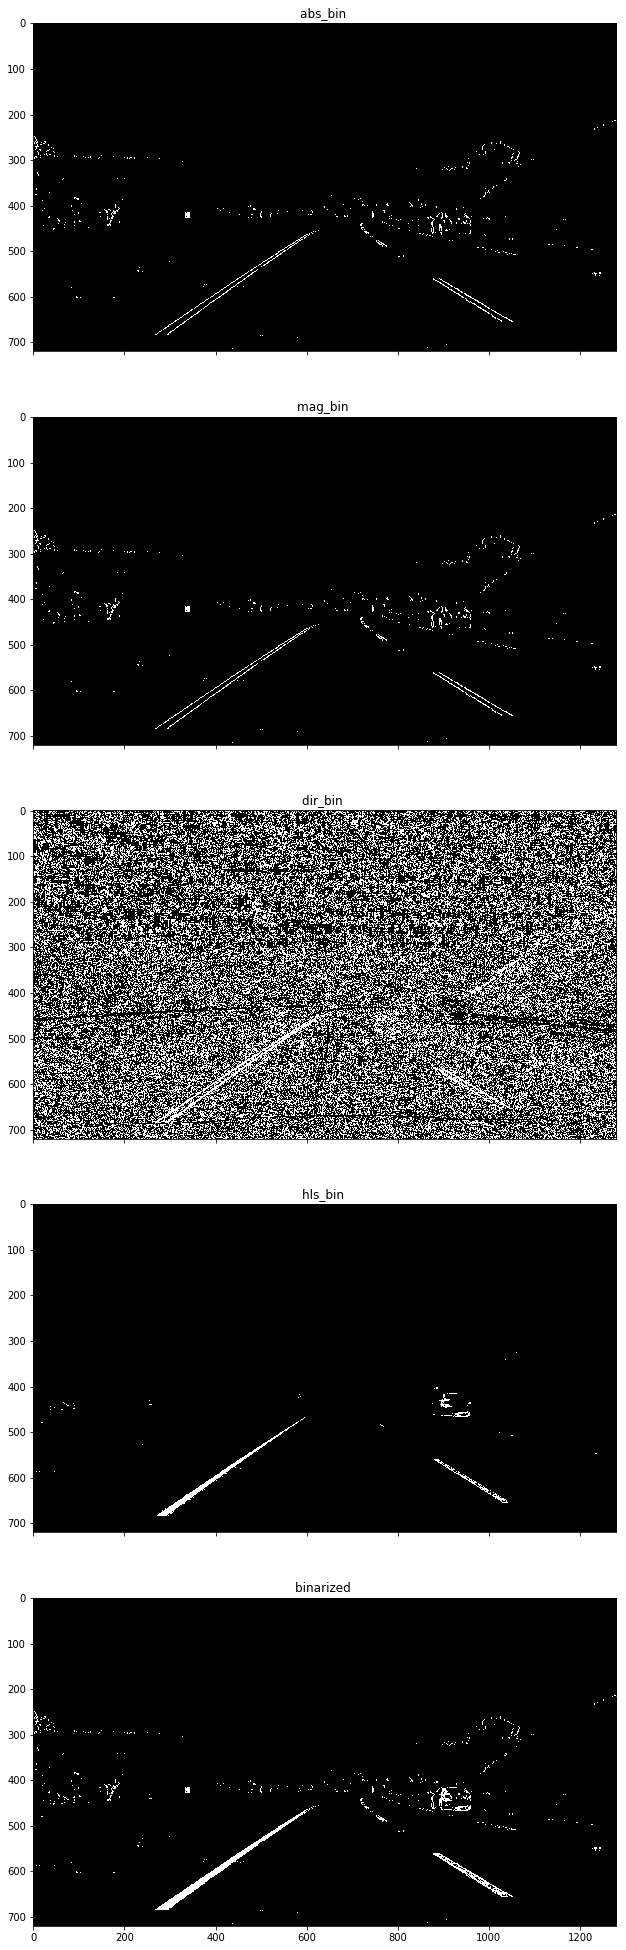

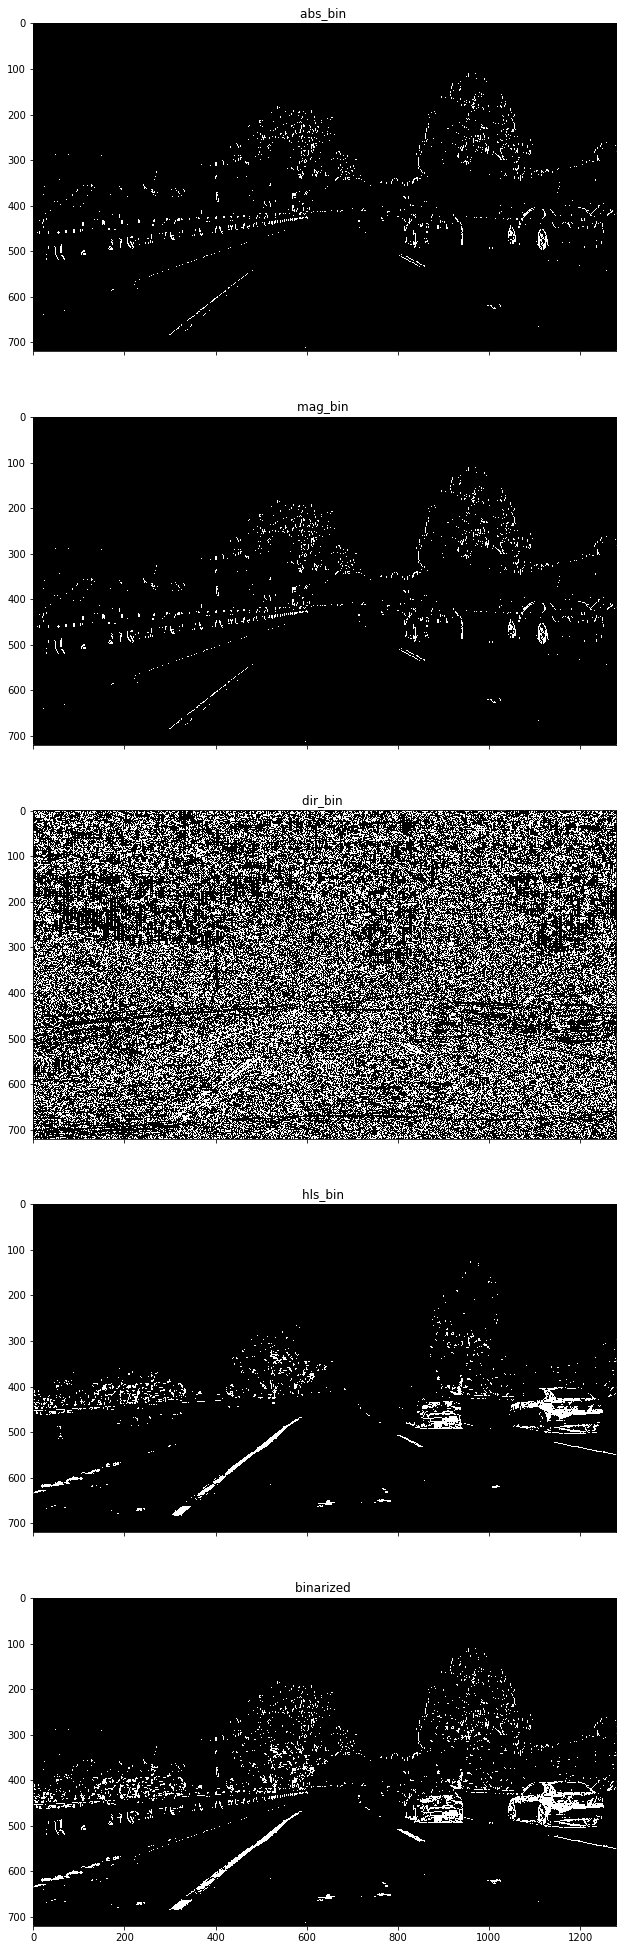

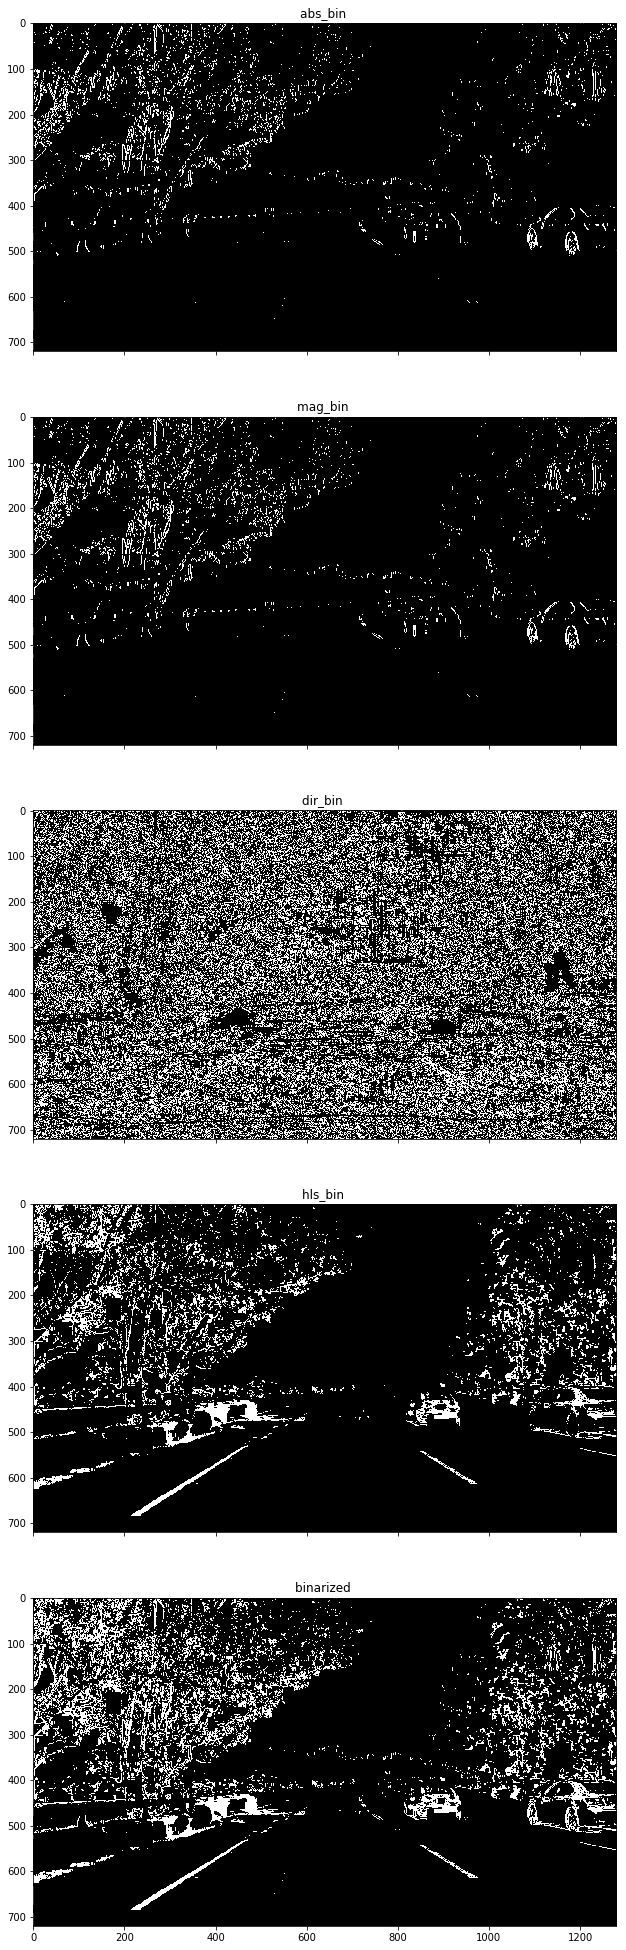

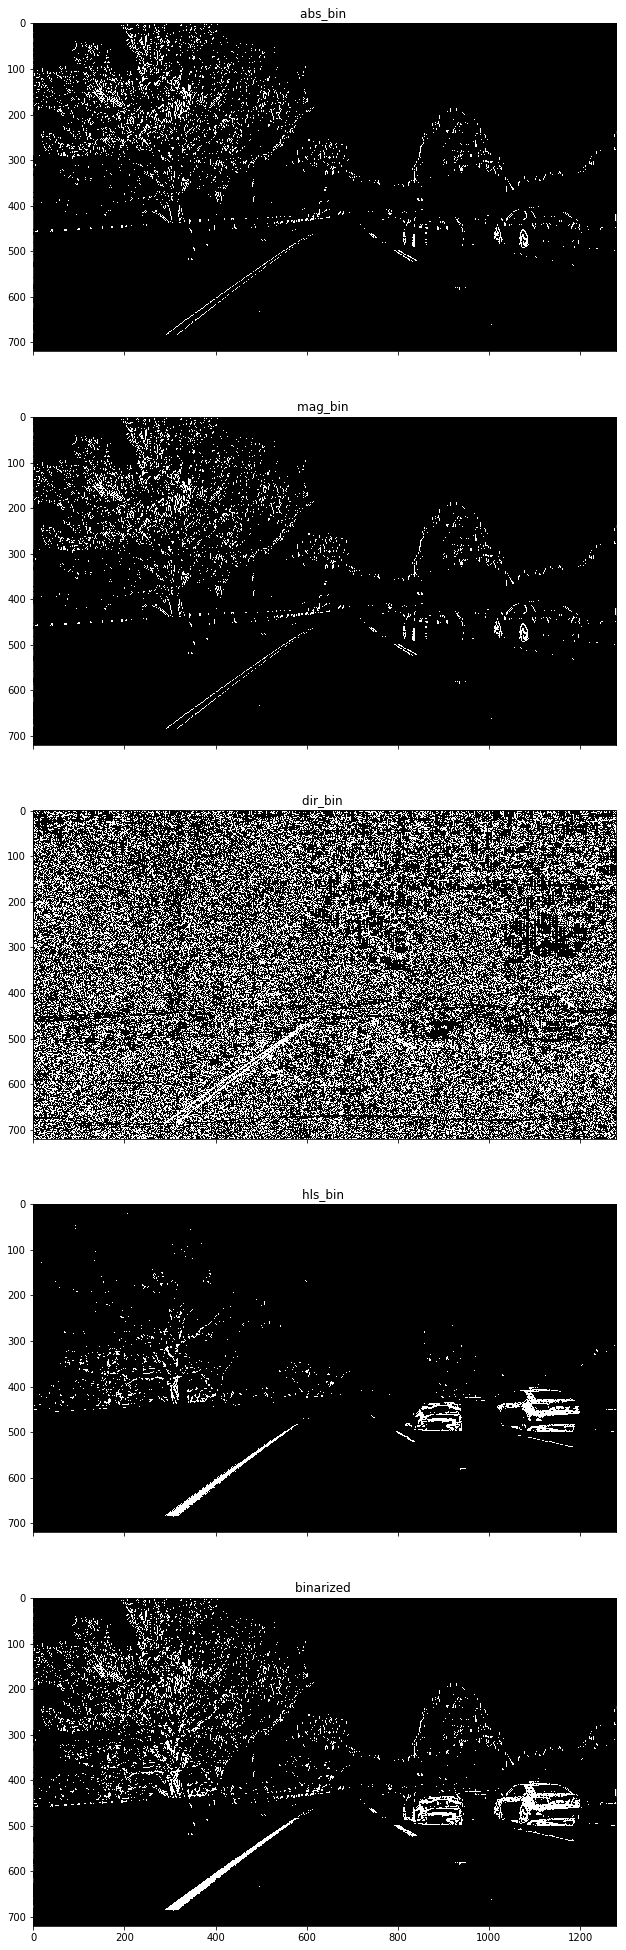

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob

# Absolute sobel operation on the image
# inputs -> image,gradient orientation, sobel kernel size,thereshold min and max values

def abs_sobel_threshold(img,orient='x',sobel_kernel = 3,thresh =(0,255)):
#     apply x and y gradient sobel function from opencv
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    if orient == 'x':
        sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize = sobel_kernel)
        abs_sobel = np.absolute(sobelx)
    if orient =='y':
        sobely = cv2.Sobel(gray,cv2.CV2_64F,0,1,ksize = sobel_kernel)
        abs_sobel = np.absolute(sobely)
    
#     rescale back to 8 bit interger
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
#     creating a copy to apply thresholds
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0])&(scaled_sobel <= thresh[1])] = 1
    return binary_output

# calculate the magnitude of the gradient
# input->image,sobel kernel size,magnitude threshold min and max values

def magnitude_threshold(img,sobel_kernel=3,mag_thresh = (0,255)):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     sobel tranformation in x 
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize = sobel_kernel)
#     sobel transformation in y
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize = sobel_kernel)
#     calculating the gradient magnitude
#     square root of squares of sobel transfomation in each direction
    gradient_magnitude = np.sqrt(sobelx**2,sobely**2)
#   rescale to 8 bit
    scale_factor = np.max(gradient_magnitude)/255
    gradient_magnitude = (gradient_magnitude/scale_factor).astype(np.uint8)
#     create a binary image of 1 for which met threshold value else zeros
    binary_output = np.zeros_like(gradient_magnitude)
    binary_output[(gradient_magnitude >= mag_thresh[0])&(gradient_magnitude <= mag_thresh[1])] = 1
    return binary_output

# Sobel operation to calculate the direction of the gradient
#input -> image,sobel kernel size, thresh value ranges from (0,np.pi/2)

def direction_threshold(img,sobel_kernel = 3,thresh=(0,np.pi/2)):  
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     sobel tranformation in x 
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize = sobel_kernel)
#     sobel transformation in y
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize = sobel_kernel)
#     calculate the absolute value of gradient direction
    abs_grad_direction = np.arctan2(np.absolute(sobely),np.absolute(sobelx))
    binary_output = np.zeros_like(abs_grad_direction)
    binary_output[(abs_grad_direction>=thresh[0])&(abs_grad_direction<=thresh[1])]=1
    return binary_output

# histogram equalization and use it to improve the contrast of our images
# input -> gray image, threshhold value

# def adp_thresh_grayscale(gray,thr=250):
#     img = cv2.equalizeHist(gray)
#     ret,thrs = cv2.threshold(img,thresh=thr,maxval=255,type=cv2.THRESH_BINARY)
#     return thrs

# converting the RGB to HLS and threshold to binary image using the S channel
def hls_threshold(img,thresh=(0,255)):
    hls =cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel>=thresh[0])&(s_channel<=thresh[1])] = 1
    return binary_output
def binary_threshold(img,verbose=False):
    abs_bin = abs_sobel_threshold(img,orient='x',sobel_kernel = 3,thresh =(50,255))
    mag_bin = magnitude_threshold(img,sobel_kernel=3,mag_thresh = (50,255))
    dir_bin = direction_threshold(img,sobel_kernel = 3,thresh=(0.7,1.3))
    hls_bin = hls_threshold(img,thresh=(170,255))
    
    binarized = np.zeros_like(dir_bin)
    binarized[(abs_bin == 1 | ((mag_bin == 1) & (dir_bin == 1))) | hls_bin == 1] = 1
    
    kernel = np.ones((5,5),np.uint8)
    final = cv2.morphologyEx(binarized.astype(np.uint8),cv2.MORPH_CLOSE,kernel)
    
    if verbose:
        f = plt.figure(figsize=(100,35))
        ax1, ax2, ax3, ax4,ax5 = f.subplots(5, 1, sharex='col', sharey='row')
        ax1.imshow(abs_bin,cmap='gray')
        ax1.set_title('abs_bin ')
        ax2.imshow(mag_bin,cmap='gray')
        ax2.set_title('mag_bin ')
        ax3.imshow(dir_bin,cmap='gray')
        ax3.set_title('dir_bin ')
        ax4.imshow(hls_bin,cmap='gray')
        ax4.set_title('hls_bin ') 
        ax5.imshow(binarized,cmap='gray')
        ax5.set_title('binarized ')
        
    return final




if __name__ == "__main__":
    
    test_images = glob.glob('test_images/*.jpg')
    for test_image in test_images:
        img=cv2.imread(test_image)
        
        binary_threshold(img=img,verbose=True)
                            
    
    
    
    